<a href="https://colab.research.google.com/github/stancsz/vlogs-with-code/blob/main/timeseries/making_timeseries_data_stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making timeseries data stationary



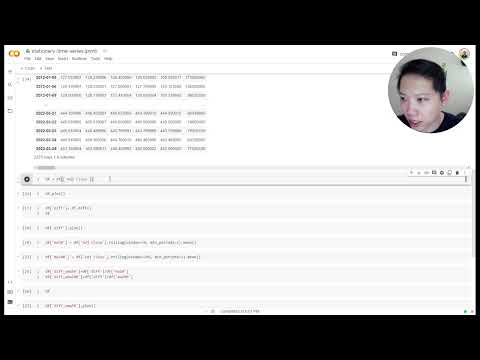

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('5RqcUFxKkJ4')

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from datetime import date
import pandas as pd
from pandas_datareader import data as pdr

In [ ]:
today = date.today()
spy = yf.Ticker("SPY")
print(spy.info)
yf.pdr_override() # dataframe override
df = pdr.get_data_yahoo("SPY", start="2012-01-01", end=today)
df

{'exchange': 'PCX', 'shortName': 'SPDR S&P 500', 'longName': 'SPDR S&P 500 ETF Trust', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'ETF', 'symbol': 'SPY', 'messageBoardId': 'finmb_6160262', 'market': 'us_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 727660800, 'annualReportExpenseRatio': None, 'totalAssets': 455220789248, 'bookValue': None, 'fundFamily': 'SPDR State Street Global Advisors', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.012999999, 'mostRecentQuarter': None, 'enterpriseValue': None, 'priceHint': 2, 'threeYear

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,104.950829,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,105.115440,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,105.395317,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,105.123688,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,105.378845,99530200
...,...,...,...,...,...,...
2022-03-21,444.339996,446.459991,440.679993,444.390015,444.390015,88349800
2022-03-22,445.859985,450.579987,445.859985,449.589996,449.589996,74650400
2022-03-23,446.910004,448.489990,443.709991,443.799988,443.799988,79426100


In [ ]:
df = df[['Adj Close']]

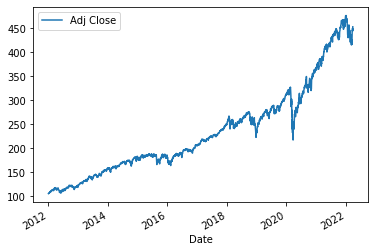

In [ ]:
df.plot()

In [ ]:
df['diff']= df.diff()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,diff
Date,,
2012-01-03,104.950829,NaN
2012-01-04,105.115440,0.164612
2012-01-05,105.395317,0.279877
2012-01-06,105.123688,-0.271629
2012-01-09,105.378845,0.255157
...,...,...
2022-03-21,444.390015,-0.129974
2022-03-22,449.589996,5.199982
2022-03-23,443.799988,-5.790009


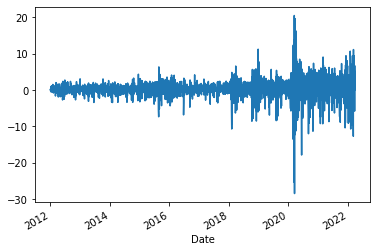

In [ ]:
df['diff'].plot()

In [ ]:
df['ma50'] = df['Adj Close'].rolling(window=50, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['ma200'] = df['Adj Close'].rolling(window=200, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Adj Close,diff,ma50,ma200
Date,,,,
2012-01-03,104.950829,NaN,104.950829,104.950829
2012-01-04,105.115440,0.164612,105.033134,105.033134
2012-01-05,105.395317,0.279877,105.153862,105.153862
2012-01-06,105.123688,-0.271629,105.146318,105.146318
2012-01-09,105.378845,0.255157,105.192824,105.192824
...,...,...,...,...
2022-03-21,444.390015,-0.129974,440.424402,443.089031
2022-03-22,449.589996,5.199982,440.123272,443.253449
2022-03-23,443.799988,-5.790009,439.717905,443.388473


In [ ]:
df['diff_wma50']=df['diff']/df['ma50']
df['diff_wma200']=df['diff']/df['ma200']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Adj Close,diff,ma50,ma200,diff_wma50,diff_wma200
Date,,,,,,
2012-01-03,104.950829,NaN,104.950829,104.950829,NaN,NaN
2012-01-04,105.115440,0.164612,105.033134,105.033134,0.001567,0.001567
2012-01-05,105.395317,0.279877,105.153862,105.153862,0.002662,0.002662
2012-01-06,105.123688,-0.271629,105.146318,105.146318,-0.002583,-0.002583
2012-01-09,105.378845,0.255157,105.192824,105.192824,0.002426,0.002426
...,...,...,...,...,...,...
2022-03-21,444.390015,-0.129974,440.424402,443.089031,-0.000295,-0.000293
2022-03-22,449.589996,5.199982,440.123272,443.253449,0.011815,0.011731
2022-03-23,443.799988,-5.790009,439.717905,443.388473,-0.013168,-0.013059


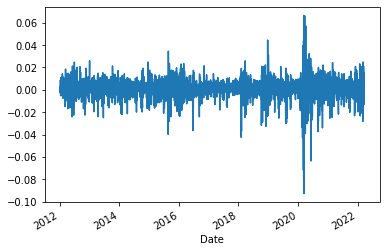

In [ ]:
df['diff_wma50'].plot()

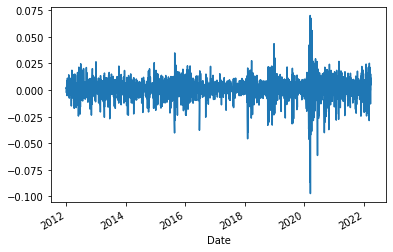

In [ ]:
df['diff_wma200'].plot()

recommended readings:
- https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/
- https://otexts.com/fpp2/arima-r.html
- https://www.kdnuggets.com/2019/08/stationarity-time-series-data.html